In [ ]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
from collections import Counter
import sys
import os
from __future__ import division
plt.rcParams["figure.figsize"] = (20,10)
import tqdm as tqdm

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [ ]:
episodes = []
for i in range(5):
    episodes.append(pd.read_csv('starwars-episode-{}-edges.csv'.format(i+1)))

ParserError: ignored

In [ ]:
all_episodes = pd.concat(episodes)

In [ ]:
all_episodes.head()

,Source,Target,Type,weight,episode
0,15.0,0.0,undirected,11.0,1
1,1.0,0.0,undirected,14.0,1
2,18.0,0.0,undirected,16.0,1
3,0.0,17.0,undirected,3.0,1
4,22.0,0.0,undirected,2.0,1


In [ ]:
edges = all_episodes.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index()

In [ ]:
edges.sort_values('weight',ascending=False).head()

,Source,Target,weight
19,5.0,1.0,26.0
45,12.0,1.0,22.0
68,18.0,1.0,22.0
73,18.0,15.0,16.0
62,15.0,1.0,16.0


In [ ]:
GOT = nx.from_pandas_edgelist(edges, 
                            source='Source',
                            target='Target',
                            edge_attr='weight' )

In [ ]:
print(nx.info(GOT))


Graph with 38 nodes and 135 edges


In [ ]:
weighted_degrees = dict(nx.degree(GOT,weight='weight'))
max_degree = max(weighted_degrees.values())

In [ ]:
import seaborn as sns

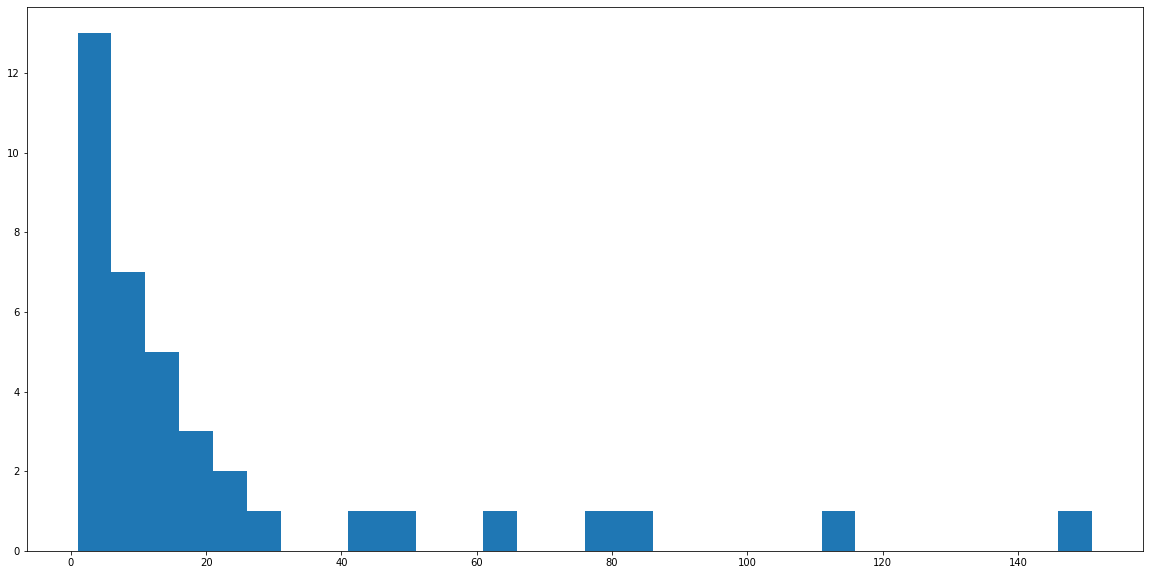

In [ ]:
h = plt.hist(weighted_degrees.values(), bins = 30)


In [ ]:
subG = GOT.subgraph([n for n in weighted_degrees if weighted_degrees[n]>2])

In [ ]:
print(nx.info(subG))

Graph with 35 nodes and 131 edges


In [ ]:
pos = nx.spring_layout(subG,weight='weight',iterations=20, k = 4)

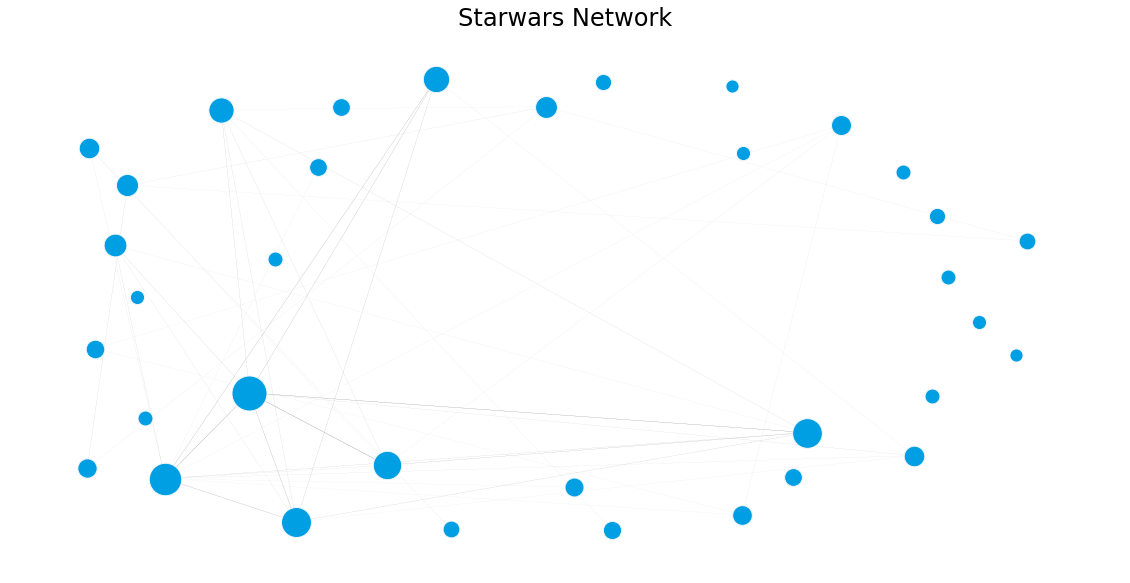

In [ ]:
plt.axis('off')
plt.title('Starwars Network',fontsize = 24)


for node in subG.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subG,pos,nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

'''nx.draw_networkx_labels(subG,pos,{n:n.replace('-','\n') for n in subG.nodes() if weighted_degrees[n]>1},font_size=10);'''

for e in subG.edges(data=True):
    if e[2]['weight']>2:
        nx.draw_networkx_edges(subG,pos,[e],width=e[2]['weight']/100,edge_color='#707070')